In [1]:
from gensim.models import Word2Vec
import pandas as pd

In [2]:
doc = pd.read_csv("will_play_text.csv", sep=";", header=None)
playName = open("play_names.txt", "r")
plays = []
for name in playName:
	plays.append(name.rstrip())

In [3]:
play_doc = {}

In [32]:
with open("vocab.txt", "r") as f:
	vocab = f.readlines()
for i in range(len(vocab)):
	vocab[i] = vocab[i].rstrip()

import nltk
txt = []
for play in plays:
    lines = []
    for row in range(len(doc)):
        if doc[1][row] == play:
            txt.append([w for w in nltk.word_tokenize(doc[5][row]) if w in vocab])
            lines.append([w for w in nltk.word_tokenize(doc[5][row]) if w in vocab])
    play_doc[play] = lines

In [33]:
play_model = {}

wvmodel = Word2Vec(txt, size=100, min_count=1)



In [34]:
play_ave = {}
for play in plays:
    count = 0
    vec = []
    for s in play_doc[play]:
        for w in s:
            if w in wvmodel.wv.vocab:
                vec.append(wvmodel[w])
                count += 1
#     print(count)
    play_ave[play] = sum(vec)/count
    
    

/share/pkg.7/python3/3.7.9/install/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [35]:
from sklearn.metrics.pairwise import cosine_similarity
plays_comedy = ["The Tempest", "Two Gentlemen of Verona", "Merry Wives of Windsor", "Measure for measure", "A Comedy of Errors", "Much Ado about nothing", "Loves Labours Lost", "A Midsummer nights dream", "Merchant of Venice", "As you like it", "Taming of the Shrew", "Alls well that ends well", "Twelfth Night", "A Winters Tale", "Pericles"]
plays_history = ["King John", "Richard II", "Richard III", "Henry IV", "Henry VI Part 2", "Henry VIII", "Henry VI Part 1", "Henry V", "Henry VI Part 3"]
plays_tragedy = ["Troilus and Cressida", "Coriolanus", "Titus Andronicus", "Romeo and Juliet", "Timon of Athens", "Julius Caesar", "macbeth", "Hamlet", "King Lear", "Othello", "Antony and Cleopatra", "Cymbeline"]

comedy_matrix = []
history_matrix = []
tragedy_matrix = []

In [36]:
for play in plays_comedy:
    comedy_matrix.append(play_ave[play])
for play in plays_history:
    history_matrix.append(play_ave[play])
for play in plays_tragedy:
    tragedy_matrix.append(play_ave[play])

In [37]:
comedy_sim = cosine_similarity(comedy_matrix, comedy_matrix)
history_sim = cosine_similarity(history_matrix, history_matrix)
tragedy_sim = cosine_similarity(tragedy_matrix, tragedy_matrix)


In [39]:
import numpy as np
print(np.ndarray.mean(comedy_sim))


0.998523


In [40]:
print(np.ndarray.mean(tragedy_sim))

0.99838597


In [41]:
print(np.ndarray.mean(history_sim))

0.99853027


In [43]:
print(wvmodel.wv.vocab)

{'palace': <gensim.models.keyedvectors.Vocab object at 0x2b947ae44050>, 'the': <gensim.models.keyedvectors.Vocab object at 0x2b9477cadd90>, 'of': <gensim.models.keyedvectors.Vocab object at 0x2b947ae43650>, 'and': <gensim.models.keyedvectors.Vocab object at 0x2b947ae43a90>, 'others': <gensim.models.keyedvectors.Vocab object at 0x2b9477c1c490>, 'shaken': <gensim.models.keyedvectors.Vocab object at 0x2b947ae41650>, 'as': <gensim.models.keyedvectors.Vocab object at 0x2b947ae41490>, 'we': <gensim.models.keyedvectors.Vocab object at 0x2b947ae41090>, 'are': <gensim.models.keyedvectors.Vocab object at 0x2b947ae431d0>, 'so': <gensim.models.keyedvectors.Vocab object at 0x2b947ae41590>, 'wan': <gensim.models.keyedvectors.Vocab object at 0x2b947abb2250>, 'with': <gensim.models.keyedvectors.Vocab object at 0x2b947abb29d0>, 'care': <gensim.models.keyedvectors.Vocab object at 0x2b947abb25d0>, 'a': <gensim.models.keyedvectors.Vocab object at 0x2b947abb2410>, 'time': <gensim.models.keyedvectors.Vocab 

In [44]:
character_doc = {}
character = set()
for row in range(len(doc)):
    character.add(doc[4][row])
print(character)

{nan, 'ORLEANS', 'Third Fisherman', 'ROSS', 'DIONYZA', 'HASTINGS', 'LADY CAPULET', 'ESCANES', 'CORNELIUS', 'DEMETRIUS', 'HERNIA', 'SICINIUS', 'MARGARELON', 'Attendants', 'A Lord', 'JESSICA', 'YOUNG CLIFFORD', 'ALICE', 'Third Soldier', 'Players', 'BEDFORD', 'First Officer', 'ISABELLA', 'Some Others', 'GRATIANO', 'TITINIUS', 'ADRIANO DE ARMADO', 'SEBASTIAN', 'CHIRON', 'Shepherd', 'MUSTARDSEED', 'CLOTEN', 'Abbot', 'IAGO', 'HORTENSIO', 'Hostess', 'TITUS', 'Lord', 'OCTAVIA', 'RATCLIFF', 'Gardener', 'Fifth Citizen', 'LANCASTER', 'LEONINE', 'HYMEN', 'First Guard', 'LUCIANA', 'Roman', 'Danes', 'TAMORA', 'Pedant', 'Citizens', 'QUEEN KATHARINE', 'LUCIUS', 'DOCTOR CAIUS', 'CONRADE', 'Keeper', 'Clown', 'LEAR', 'ROBIN', 'BORACHIO', 'DORSET', 'Haberdasher', 'Sheriff', 'RUGBY', 'CAMILLO', 'WHITMORE', 'BASSET', 'KING', 'FRANCISCA', 'TITUS ANDRONICUS', 'Knights', 'of Prince Edward', 'Third Lord', 'EGLAMOUR', 'CHARLES', 'WARWICK', 'Sexton', 'HERBERT', 'Painter', 'First Herald', 'SPEED', 'First Priest', 

In [45]:
for people in character:
    character_doc[people] = []


for row in range(len(doc)):
    character_doc[doc[4][row]].append([w for w in nltk.word_tokenize(doc[5][row].lower()) if w in wvmodel.wv.vocab])


In [46]:
character_ave = {}
import numpy as np
for people in character:
    count = 0
    vec = np.array([0]*100)

    for s in character_doc[people]:
        for w in s:
            if w in wvmodel.wv.vocab:
                vec = vec + wvmodel[w]
                count += 1
#     print(count)
    if count != 0:
        character_ave[people] = vec/count

/share/pkg.7/python3/3.7.9/install/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [47]:
character_matrix = []
print(character_doc['NICHOLAS'])
for people in character:
    try:
        character_matrix.append(character_ave[people])
    except:
        continue


[['fellow']]


In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
res = pca.fit_transform(character_matrix)

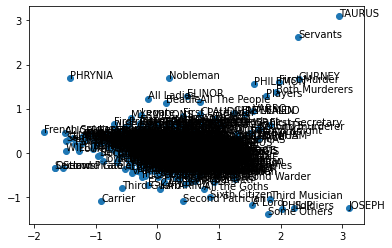

In [76]:
from matplotlib import pyplot
pyplot.scatter(res[:, 0], res[:, 1])

count = 0
for people in character:
    try:
        pyplot.annotate(people, xy=(res[count, 0], res[count, 1]))
        count += 1
    except:
        continue
pyplot.show()

In [79]:
women = ["FIRST WITCH", "Second witch", "Third witch", "Beatrice", "Bianca", "Bianca Minola", "Catherine of Valois", "Celia", "Charmion", "Cleopatra", "Cordelia", "Cressida", "Dark Lady", "Desdemona", "Eleanor, Duchess of Gloucester", "Emilia", "Gertrude", "Goneril", "Helena", "Hermia", "Hippolyta", "Imogen", "Iras", "Jessica", "MARGARET JOURDAIN", "Juliet", "Katherina Minola", "Queen Mab", "Lady Macbeth", "Lady Macduff", "Margaret of Anjou", "Maria", "Mariana", "Miranda", "Nurse", "Olivia", "Ophelia", "Perdita", "Porcia", "Portia", "Mistress Quickly", "Regan", "Rosalind", "Rosaline", "Sycorax", "Doll Tearsheet", "Three Witches", "Titania", "Viola", "Virgilia", "Volumnia"]

In [80]:
play_women = []
for woman in women:
    find = False
    for people in character:
        try:
            if woman.upper() == people.upper():
                find = True
                play_women.append(people)
        except:
            continue

print(play_women)

['First Witch', 'Second Witch', 'Third Witch', 'BEATRICE', 'BIANCA', 'CELIA', 'CLEOPATRA', 'CORDELIA', 'CRESSIDA', 'DESDEMONA', 'EMILIA', 'GONERIL', 'HELENA', 'HERMIA', 'HIPPOLYTA', 'IMOGEN', 'IRAS', 'JESSICA', 'MARGARET JOURDAIN', 'JULIET', 'LADY MACBETH', 'LADY MACDUFF', 'MARIA', 'MARIANA', 'MIRANDA', 'NURSE', 'Nurse', 'OLIVIA', 'OPHELIA', 'PERDITA', 'PORTIA', 'MISTRESS QUICKLY', 'REGAN', 'ROSALIND', 'ROSALINE', 'TITANIA', 'VIOLA', 'VIRGILIA', 'VOLUMNIA']


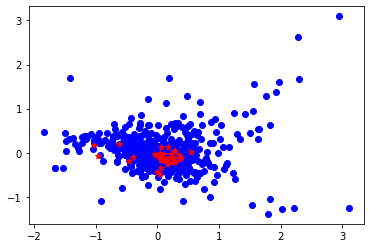

In [81]:
count = 0
pyplot.figure()
for people in character:
    if people not in play_women:
        pyplot.scatter(res[count, 0], res[count, 1], c='b', marker="o")
    count += 1
count = 0
for people in character:
    if people in play_women:
        pyplot.scatter(res[count, 0], res[count, 1], c='r', marker="*")
#         pyplot.annotate(people, xy=(res[count, 0], res[count, 1]))
    count += 1

pyplot.show()